In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

# from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from ast import literal_eval

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model, roc_results
from lob_data_utils.svm_calculation import lob_svm
import os


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data_length = 10000
rs_params = [(0.1, 1.0)]
stocks = list(roc_results.result_cv_10000.keys())
data_dir = 'res_pca_gdf_que3'

In [3]:
def get_mean_scores(scores: dict) -> dict:
    mean_scores = {}
    for k, v in scores.items():
        mean_scores[k] = np.mean(v)
    return mean_scores

def get_score_for_clf(clf, df_test):
    x_test = df_test[['queue_imbalance']]
    y_test = df_test['mid_price_indicator'].values
    return model.test_model(clf, x_test, y_test)

def get_logistic_regression(stock, data_length):
    df, df_test = lob.load_prepared_data(
        stock, data_dir='../gaussian_filter/data', cv=False, length=data_length)
    clf = LogisticRegression()
    train_x = df[['queue_imbalance']]

    scores = model.validate_model(clf, train_x, df['mid_price_indicator'])
    res = {
        **get_mean_scores(scores),
        'stock': stock,
        'kernel': 'logistic',
    }
    test_scores = get_score_for_clf(clf, df_test)
    return {**res, **test_scores}

In [4]:
df_res = pd.DataFrame()
for stock in stocks:
    for r, s in rs_params:
    #pd.read_csv('svm_features_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s))
        filename = data_dir + '/svm_pca_gdf_{}_len{}_r{}_s{}_K20-30.csv'.format(stock, data_length, r, s)
        if os.path.exists(filename):
            df_temp = pd.read_csv(filename)
            df_temp['r'] = [r] * len(df_temp)
            df_temp['s'] = [s] * len(df_temp)
            df_res = df_res.append(df_temp)
#df_res.drop(columns=['Unnamed: 0'], inplace=True)
columns = ['C', 'f1', 'features', 'gamma', 'kappa',
           'matthews', 'roc_auc', 'stock',
       'test_f1', 'test_kappa', 'test_matthews', 'test_roc_auc', 'r', 's']
df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)

,C,f1,features,gamma,kappa,matthews,roc_auc,stock,test_f1,test_kappa,test_matthews,test_roc_auc,r,s
16,0.1,0.594745,pca_gdf_20-30_que3,0.100,0.182488,0.183901,0.591521,3879,0.577349,0.123274,0.123834,0.561693,0.1,1.0
37,100.0,0.591764,pca_gdf_20-30_que3,0.100,0.167795,0.168795,0.583870,3035,0.573188,0.096500,0.096669,0.548174,0.1,1.0
37,100.0,0.624674,pca_gdf_20-30_que3,0.100,0.159451,0.161564,0.579267,10484,0.581852,0.108794,0.110672,0.554623,0.1,1.0
22,1.0,0.584376,pca_gdf_20-30_que3,0.010,0.152995,0.160746,0.576588,4320,0.621005,0.163645,0.164322,0.581449,0.1,1.0
37,100.0,0.589733,pca_gdf_20-30_que3,0.100,0.153765,0.160051,0.577065,1956,0.601573,0.139068,0.141098,0.569575,0.1,1.0
37,100.0,0.567658,pca_gdf_20-30_que3,0.100,0.152452,0.158460,0.576545,12417,0.588921,0.154333,0.154880,0.577248,0.1,1.0
36,100.0,0.626608,pca_gdf_20-30_que3,0.010,0.147638,0.156580,0.573967,13061,0.640162,0.092176,0.099023,0.545188,0.1,1.0
36,100.0,0.598578,pca_gdf_20-30_que3,0.010,0.147526,0.153821,0.573992,1472,0.656952,0.099075,0.108883,0.548149,0.1,1.0
36,100.0,0.496323,pca_gdf_20-30_que3,0.010,0.145675,0.153076,0.572535,7858,0.441276,0.158917,0.177818,0.577937,0.1,1.0
17,0.1,0.605149,pca_gdf_20-30_que3,1.000,0.149751,0.152505,0.574777,10508,0.608165,0.167627,0.170361,0.584167,0.1,1.0


In [5]:
log_res = []
for stock in stocks:
    log_res.append(get_logistic_regression(stock, data_length))
df_log_res = pd.DataFrame(log_res)
df_log_res['stock'] = df_log_res['stock'].values.astype(np.int)
df_log_res.index = df_log_res['stock'].values.astype(np.int)

In [6]:
df_gdf_best = df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)
df_gdf_best['stock'] = df_gdf_best['stock'].values.astype(np.int)
df_gdf_best.index = df_gdf_best['stock'].values.astype(np.int)

In [7]:
df_all = pd.merge(df_gdf_best, df_log_res, on='stock', suffixes=['_svm', '_log'])

In [8]:
all_columns = ['matthews_svm', 'matthews_log',  'test_matthews_svm',  'test_matthews_log', 
       'roc_auc_svm', 'roc_auc_log', 'test_roc_auc_svm',  'test_roc_auc_log', 'stock' ]
df_all[all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.183901,0.178656,0.123834,0.120812,0.591521,0.588843,0.561693,0.560288,3879
1,0.168795,0.167115,0.096669,0.099310,0.583870,0.583085,0.548174,0.549537,3035
2,0.161564,0.158982,0.110672,0.103611,0.579267,0.578350,0.554623,0.551208,10484
3,0.160746,0.156657,0.164322,0.163789,0.576588,0.577752,0.581449,0.581178,4320
4,0.160051,0.152838,0.141098,0.133788,0.577065,0.574598,0.569575,0.566273,1956
5,0.158460,0.150172,0.154880,0.154446,0.576545,0.573432,0.577248,0.576707,12417
6,0.156580,0.143094,0.099023,0.110004,0.573967,0.571097,0.545188,0.555039,13061
7,0.153821,0.148600,0.108883,0.118223,0.573992,0.572888,0.548149,0.557251,1472
8,0.153076,0.146384,0.177818,0.171235,0.572535,0.572852,0.577937,0.584512,7858
9,0.152505,0.142499,0.170361,0.162155,0.574777,0.570582,0.584167,0.580693,10508


In [9]:
df_all['matthews_diff'] = df_all['matthews_svm'] -  df_all['matthews_log']
df_all['matthews_test_diff'] = df_all['test_matthews_svm'] - df_all['test_matthews_log']

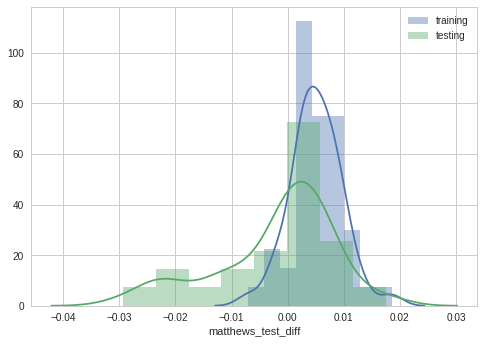

In [10]:
sns.distplot(df_all['matthews_diff'], label='training')
sns.distplot(df_all['matthews_test_diff'], label='testing')
plt.legend()

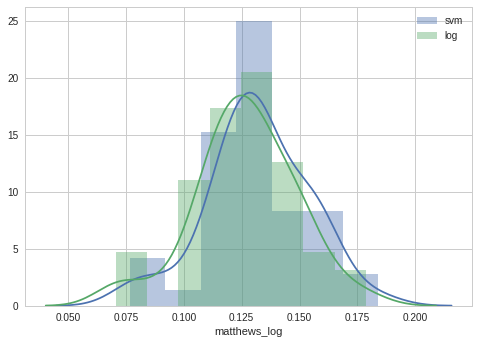

In [11]:
sns.distplot(df_all['matthews_svm'], label='svm')
sns.distplot(df_all['matthews_log'], label='log')
plt.legend()

In [12]:
df_all['matthews_diff'].sum(), df_all['matthews_test_diff'].sum()

(0.23876193329397571, -0.09721723854593578)

In [13]:
len(df_all[df_all['matthews_svm'] > df_all['matthews_log']][all_columns]), len(df_all[df_all['test_matthews_svm'] > df_all['test_matthews_log']]), len(df_all)

(41, 29, 47)

In [14]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
1,0.168795,0.167115,0.096669,0.099310,0.583870,0.583085,0.548174,0.549537,3035
6,0.156580,0.143094,0.099023,0.110004,0.573967,0.571097,0.545188,0.555039,13061
7,0.153821,0.148600,0.108883,0.118223,0.573992,0.572888,0.548149,0.557251,1472
13,0.141783,0.137272,0.157193,0.168692,0.570451,0.567489,0.578575,0.583011,3161
16,0.135976,0.125630,0.141948,0.143575,0.565922,0.561209,0.568838,0.570249,1907
17,0.135904,0.132153,0.070525,0.094105,0.563226,0.565317,0.533886,0.547029,12456
19,0.133878,0.136666,0.093111,0.096997,0.566371,0.567394,0.546264,0.547942,4060
20,0.133506,0.131577,0.127429,0.150530,0.562720,0.564686,0.554020,0.570781,2602
21,0.132897,0.125634,0.147331,0.162023,0.566174,0.562340,0.573676,0.580890,2651
23,0.132579,0.130253,0.134239,0.134860,0.565843,0.564948,0.566959,0.567422,9086


In [15]:
len(df_all[df_all['roc_auc_svm'] > df_all['roc_auc_log']][all_columns]), len(df_all[df_all['test_roc_auc_svm'] > df_all['test_roc_auc_log']][all_columns]), len(df_all)

(34, 28, 47)

In [16]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
1,0.168795,0.167115,0.096669,0.099310,0.583870,0.583085,0.548174,0.549537,3035
6,0.156580,0.143094,0.099023,0.110004,0.573967,0.571097,0.545188,0.555039,13061
7,0.153821,0.148600,0.108883,0.118223,0.573992,0.572888,0.548149,0.557251,1472
13,0.141783,0.137272,0.157193,0.168692,0.570451,0.567489,0.578575,0.583011,3161
16,0.135976,0.125630,0.141948,0.143575,0.565922,0.561209,0.568838,0.570249,1907
17,0.135904,0.132153,0.070525,0.094105,0.563226,0.565317,0.533886,0.547029,12456
19,0.133878,0.136666,0.093111,0.096997,0.566371,0.567394,0.546264,0.547942,4060
20,0.133506,0.131577,0.127429,0.150530,0.562720,0.564686,0.554020,0.570781,2602
21,0.132897,0.125634,0.147331,0.162023,0.566174,0.562340,0.573676,0.580890,2651
23,0.132579,0.130253,0.134239,0.134860,0.565843,0.564948,0.566959,0.567422,9086


In [17]:
df_all[df_all['test_roc_auc_svm'] < df_all['test_roc_auc_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
1,0.168795,0.167115,0.096669,0.099310,0.583870,0.583085,0.548174,0.549537,3035
6,0.156580,0.143094,0.099023,0.110004,0.573967,0.571097,0.545188,0.555039,13061
7,0.153821,0.148600,0.108883,0.118223,0.573992,0.572888,0.548149,0.557251,1472
8,0.153076,0.146384,0.177818,0.171235,0.572535,0.572852,0.577937,0.584512,7858
13,0.141783,0.137272,0.157193,0.168692,0.570451,0.567489,0.578575,0.583011,3161
16,0.135976,0.125630,0.141948,0.143575,0.565922,0.561209,0.568838,0.570249,1907
17,0.135904,0.132153,0.070525,0.094105,0.563226,0.565317,0.533886,0.547029,12456
19,0.133878,0.136666,0.093111,0.096997,0.566371,0.567394,0.546264,0.547942,4060
20,0.133506,0.131577,0.127429,0.150530,0.562720,0.564686,0.554020,0.570781,2602
21,0.132897,0.125634,0.147331,0.162023,0.566174,0.562340,0.573676,0.580890,2651
